**ADZD - laboratorium nr 2**

1. Narysuj wykres zależności kolumn Plot Infant mortality vs. Literacy dla 30 najbogatszych i 30 najbiedniejszych krajów.

2. Wczytaj zbiór danych "airports.csv" ze strony https://www.kaggle.com/jonatancr/airports (zawiera on dane na temat lotnisk z całego świata). Ponieważ w zbiorze tym nie ma nagłówka, nadaj własne nazwy kolumnom, korzystając z opisu pliku na stronie https://openflights.org/data.html. Narysuj na wykresie (mapie) położenia wszystkich/wybranych lotnisk.

3. Dla każdego kraju znaleź lotnisko której jest najbliżej Bieguna Południowego.

4. Na wykresie scatterplot narysuj zależność liczby lotnisk od powierzchni kraju. Dane potrzebne do wykresu są w dwóch ramkach (Countries i Airports), konieczne więc będzie ich złączenie (join). Nie zawsze nazwy tych samych krajów będą identyczne w obu ramkach, co może stanowić problem (złączenie nie powstanie). Zastanów się jak przy pomocy mechanizmu złączeń wykryć, które nazwy się różnią. Stwórz odpowiednią ramkę, która zawiera takie nazwy.

5. Oblicz, ile lotnisk jest na poszczególnych kontynentach. To zadanie również wymaga złączenia ramek "Countries" i "Airports". Wynik przedstaw na wykresie słupkowym.

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')

In [2]:
# # Tworzymy własne środowisko
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [3]:
# Inicjalizacja
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
spark

**Zadanie nr 1**

Potrzebujemy oczyścić nasze dane, m.in. poprawić reprezentację liczb.

In [5]:
countries_file_path = './Datasets/countries of the world.csv'

# Wczytujemy dane
countries = spark.read.csv(countries_file_path, header=True)

# Drukujemy dane
countries.toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,None,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [6]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf

def to_float (s) :
  return float(s.replace(',','.'))

float_udf = udf(to_float , FloatType())

full_countries = countries.select('Country', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'GDP ($ per capita)').na.drop()
full_countries = full_countries.withColumn('Infant mortality (per 1000 births)', float_udf('Infant mortality (per 1000 births)'))
full_countries = full_countries.withColumn('Literacy (%)', float_udf('Literacy (%)'))
full_countries = full_countries.withColumn('GDP ($ per capita)', float_udf('GDP ($ per capita)'))
full_countries.show()

+------------------+----------------------------------+------------+------------------+
|           Country|Infant mortality (per 1000 births)|Literacy (%)|GDP ($ per capita)|
+------------------+----------------------------------+------------+------------------+
|      Afghanistan |                            163.07|        36.0|             700.0|
|          Albania |                             21.52|        86.5|            4500.0|
|          Algeria |                              31.0|        70.0|            6000.0|
|   American Samoa |                              9.27|        97.0|            8000.0|
|          Andorra |                              4.05|       100.0|           19000.0|
|           Angola |                            191.19|        42.0|            1900.0|
|         Anguilla |                             21.03|        95.0|            8600.0|
|Antigua & Barbuda |                             19.46|        89.0|           11000.0|
|        Argentina |            

In [149]:
full_countries.createOrReplaceTempView('countries')

Najpierw narysujemy wykres dla 30 najbogatszych krajów.

In [9]:
query_30_richest = """SELECT
                        `Infant mortality (per 1000 births)`
                        ,`Literacy (%)`
                        ,Country
                      FROM
                        countries
                      ORDER BY
                        `GDP ($ per capita)` DESC
                      LIMIT 30
                    """

countries_30_richest = spark.sql(query_30_richest)
countries_30_richest.show()

+----------------------------------+------------+---------------+
|Infant mortality (per 1000 births)|Literacy (%)|        Country|
+----------------------------------+------------+---------------+
|                              4.81|       100.0|    Luxembourg |
|                               3.7|       100.0|        Norway |
|                               6.5|        97.0| United States |
|                              8.53|        98.0|       Bermuda |
|                              8.19|        98.0|Cayman Islands |
|                              5.73|        96.0|    San Marino |
|                              4.39|        99.0|   Switzerland |
|                              4.56|       100.0|       Denmark |
|                              3.31|        99.9|       Iceland |
|                              4.66|        98.0|       Austria |
|                              4.75|        97.0|        Canada |
|                              5.39|        98.0|       Ireland |
|         

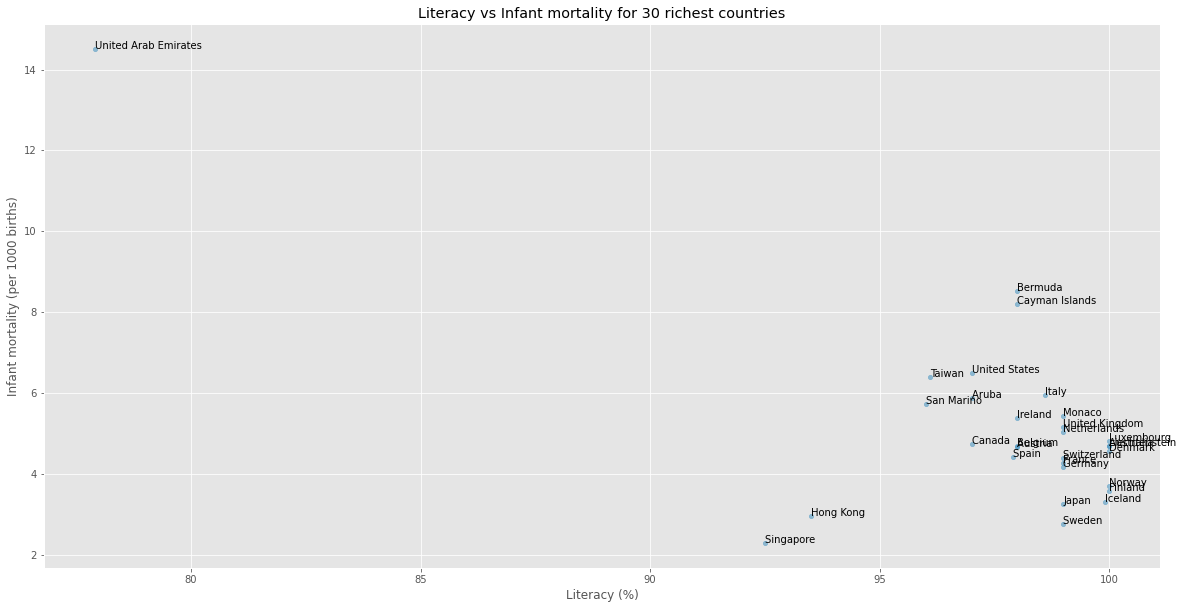

In [10]:
pd_30_richest = countries_30_richest.toPandas()


ax = pd_30_richest.plot.scatter(x='Literacy (%)', 
                                y='Infant mortality (per 1000 births)',
                                title='Literacy vs Infant mortality for 30 richest countries' ,
                                alpha=0.5,figsize=(20, 10))
for i, txt in enumerate(pd_30_richest['Country']):
  ax.annotate(txt, (pd_30_richest['Literacy (%)'][i], pd_30_richest['Infant mortality (per 1000 births)'][i]))

Teraz narysujemy wykres dla 30 najuboższych krajów.

In [11]:
query_30_poorest = """SELECT
                        `Infant mortality (per 1000 births)`
                        ,`Literacy (%)`
                        ,Country
                      FROM
                        countries
                      ORDER BY
                        `GDP ($ per capita)` ASC
                      LIMIT 30
                    """
countries_30_poorest = spark.sql(query_30_poorest)

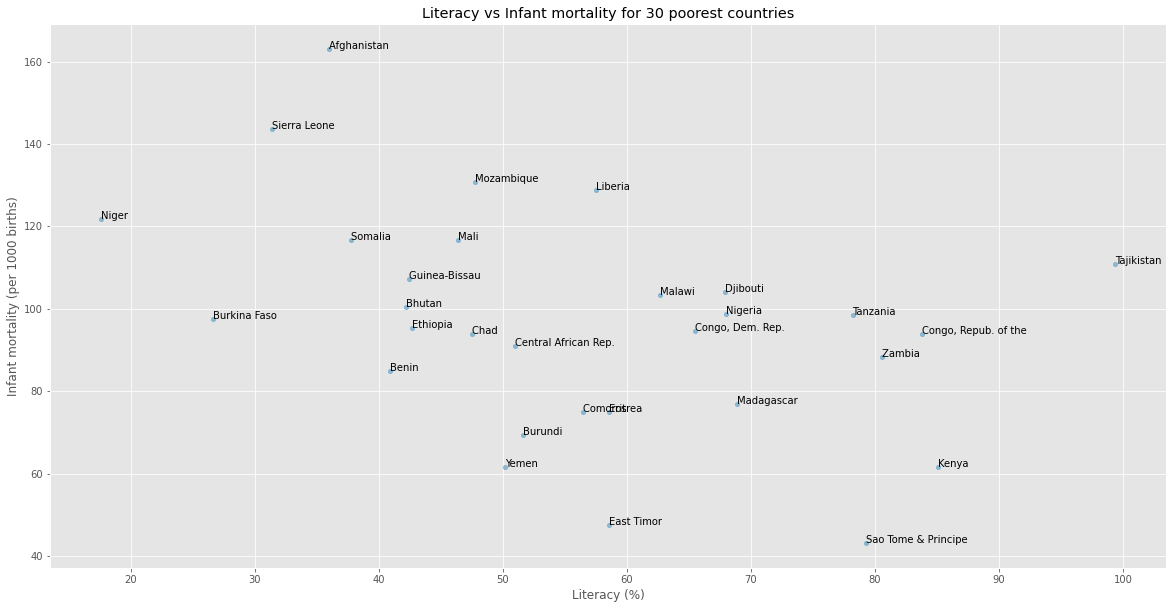

In [12]:
pd_30_poorest = countries_30_poorest.toPandas()

ax = pd_30_poorest.plot.scatter(x='Literacy (%)', 
                                y='Infant mortality (per 1000 births)',
                                title='Literacy vs Infant mortality for 30 poorest countries' ,
                                alpha=0.5,figsize=(20, 10))
for i, txt in enumerate(pd_30_poorest['Country']):
  ax.annotate(txt, (pd_30_poorest['Literacy (%)'][i], pd_30_poorest['Infant mortality (per 1000 births)'][i]))

**Zadanie nr 2**

Wczytujemy zbiór danych airports.csv i nadajemy własne nazwy kolumnom.

In [13]:
airports_file_path = './Datasets/airports.csv'

# Wczytujemy dane
airports = spark.read.csv(airports_file_path, header=False)

# Drukujemy dane
airports.toPandas()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7179,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.25788497924805,120.50165557861328,0,\N,\N,\N,airport,OurAirports
7180,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.3906,118.408997,0,\N,\N,\N,airport,OurAirports
7181,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.91170120239258,90.24749755859375,0,\N,\N,\N,airport,OurAirports
7182,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.3586,0,\N,\N,\N,airport,OurAirports


Dodajemy nagłówki kolumn.

In [14]:
 airports = airports.toDF(*("Airport ID",
                                "Name",
                                "City",
                                "Country",
                                "IATA",
                                "ICAO",
                                "Latitude",
                                "Longitude",
                                "Altitude",
                                "Timezone",
                                "DST",
                                "Tz database time",
                                "zone",
                                "Type"))

In [15]:
airports = airports.na.drop()
airports

DataFrame[Airport ID: string, Name: string, City: string, Country: string, IATA: string, ICAO: string, Latitude: string, Longitude: string, Altitude: string, Timezone: string, DST: string, Tz database time: string, zone: string, Type: string]

Robimy konwersję do floatów.

In [16]:
airports = airports.withColumn('Latitude', float_udf('Latitude'))
airports = airports.withColumn('Longitude', float_udf('Longitude'))
airports

DataFrame[Airport ID: string, Name: string, City: string, Country: string, IATA: string, ICAO: string, Latitude: float, Longitude: float, Altitude: string, Timezone: string, DST: string, Tz database time: string, zone: string, Type: string]

Nanosimy punkty na mapę.

In [18]:
# !pip install basemap-data-hires
# !pip install basemap

from itertools import chain
from mpl_toolkits.basemap import Basemap
import numpy as np

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 78 kB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.2 MB/s 
     |████████████████████████████████| 30.5 MB 66.5 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 37.5 MB/s 


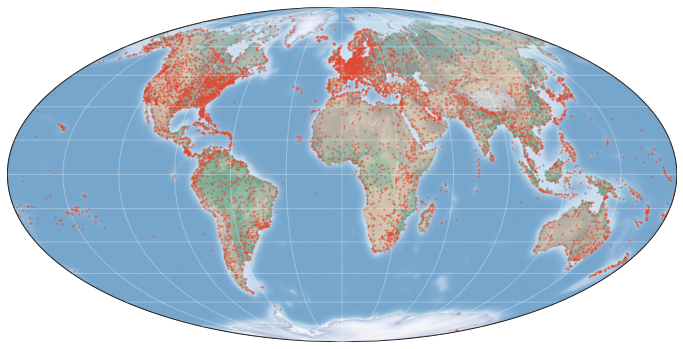

In [19]:
fig = plt.figure(figsize=(12, 8), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

pd_airports = airports.toPandas()

m.scatter(pd_airports['Longitude'], pd_airports['Latitude'], latlon=True,
          cmap='Reds', marker='D', alpha=0.5,  s=2)

**Zadanie nr 3**

Dla każdego kraju znajdujemy lotnisko, które jest najbliżej Bieguna Południowego.

In [206]:
# Biegun południowy = (-90, 0)

airports.withColumn('SP_distance', (airports.Latitude + 90)**2 + airports.Longitude**2) \
        .groupby('Country','Name').min('SP_distance') \
        .show()

+------------------+--------------------+------------------+
|           Country|                Name|  min(SP_distance)|
+------------------+--------------------+------------------+
|            Canada|Kelowna Internati...|33838.816547594324|
|           Nigeria|       Benin Airport| 9308.314740879801|
|           Belgium|  Zutendaal Air Base|19897.450568414322|
|          Tanzania|Kilimanjaro Inter...| 8868.985188102874|
|           Croatia|        Pula Airport|18390.082288225698|
|Dominican Republic|Punta Cana Intern...|16460.434837505454|
|            Mexico|Cozumel Internati...| 19771.26049295813|
|         Nicaragua|  Bluefields Airport|17420.263574669196|
|            Belize|Philip S. W. Gold...|19362.995829145017|
|              Iran|      Bastak Airport|16689.327289004883|
|             Japan|     Komatsu Airport| 34582.46390381205|
|            Brazil|Governador Aluízi...| 8346.489086392525|
|            Russia|Khabarovsk-Novy A...|  37465.8030513213|
|     United States|Boei

**Zadanie nr 4**

Narysujemy teraz wykres zależności liczby lotnisk od powierzchni kraju, wybierając uprzednio potrzebne nam kolumny.

Przyjrzyjmy się nazwom krajów.

In [184]:
from pyspark.sql.functions import regexp_replace, col
from pyspark.sql.types import StringType

def normalize_countries(country: str) -> str:

  result = str(country)
  return result[:-1]

normalize_udf = udf(normalize_countries, StringType())
countries_improved = countries.withColumn('Country', normalize_udf('Country'))
countries_improved.show(20)

+-----------------+--------------------+----------+-------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|          Country|              Region|Population|   Area|Pop. Density (per sq. mi.)|Coastline (coast/area ratio)|Net migration|Infant mortality (per 1000 births)|GDP ($ per capita)|Literacy (%)|Phones (per 1000)|Arable (%)|Crops (%)|Other (%)|Climate|Birthrate|Deathrate|Agriculture|Industry|Service|
+-----------------+--------------------+----------+-------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|      Afghanistan|ASIA (EX. NEAR EA...|  31056997| 647500|                      48,0|     

In [189]:
# Spark nie widzi Area (sq. mi.), więc zmieniamy nazwę
countries_improved = countries_improved.withColumnRenamed("Area (sq. mi.)", "Area")

countries_to_merge = countries_improved.select('Country', 'Area', 'Region')
countries_to_merge.show(20)

+-----------------+-------+--------------------+
|          Country|   Area|              Region|
+-----------------+-------+--------------------+
|      Afghanistan| 647500|ASIA (EX. NEAR EA...|
|          Albania|  28748|EASTERN EUROPE   ...|
|          Algeria|2381740|NORTHERN AFRICA  ...|
|   American Samoa|    199|OCEANIA          ...|
|          Andorra|    468|WESTERN EUROPE   ...|
|           Angola|1246700|SUB-SAHARAN AFRIC...|
|         Anguilla|    102|LATIN AMER. & CAR...|
|Antigua & Barbuda|    443|LATIN AMER. & CAR...|
|        Argentina|2766890|LATIN AMER. & CAR...|
|          Armenia|  29800|C.W. OF IND. STATES |
|            Aruba|    193|LATIN AMER. & CAR...|
|        Australia|7686850|OCEANIA          ...|
|          Austria|  83870|WESTERN EUROPE   ...|
|       Azerbaijan|  86600|C.W. OF IND. STATES |
|     Bahamas, The|  13940|LATIN AMER. & CAR...|
|          Bahrain|    665|NEAR EAST        ...|
|       Bangladesh| 144000|ASIA (EX. NEAR EA...|
|         Barbados| 

In [190]:
airports_to_merge = airports.select('Airport ID', 'Country')
airports_to_merge.show(20)

+----------+----------------+
|Airport ID|         Country|
+----------+----------------+
|         1|Papua New Guinea|
|         2|Papua New Guinea|
|         3|Papua New Guinea|
|         4|Papua New Guinea|
|         5|Papua New Guinea|
|         6|Papua New Guinea|
|         7|       Greenland|
|         8|       Greenland|
|         9|       Greenland|
|        10|       Greenland|
|        11|         Iceland|
|        12|         Iceland|
|        13|         Iceland|
|        14|         Iceland|
|        15|         Iceland|
|        16|         Iceland|
|        17|         Iceland|
|        18|         Iceland|
|        19|         Iceland|
|        20|         Iceland|
+----------+----------------+
only showing top 20 rows



In [191]:
merged = airports_to_merge.join(countries_to_merge, airports_to_merge["Country"] == countries_to_merge["Country"], "fullouter")
merged = merged.toDF(*("Airport ID",
                       "Country_airports",
                       "Country_countries",
                       "Area",
                       "Region"))

merged = merged.filter("""Country_airports IS NOT NULL AND Country_countries IS NOT NULL""").show()

+----------+----------------+-----------------+-------+--------------------+
|Airport ID|Country_airports|Country_countries|   Area|              Region|
+----------+----------------+-----------------+-------+--------------------+
|         1|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         2|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         3|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         4|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         5|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         6|Papua New Guinea| Papua New Guinea| 462840|OCEANIA          ...|
|         7|       Greenland|        Greenland|2166086|NORTHERN AMERICA ...|
|         8|       Greenland|        Greenland|2166086|NORTHERN AMERICA ...|
|         9|       Greenland|        Greenland|2166086|NORTHERN AMERICA ...|
|        10|       Greenland|        Greenland|2166086|NORTHERN AMERICA ...|

Teraz możemy bezpiecznie zrobić inner joina.

In [192]:
merged = airports_to_merge.join(countries_to_merge, airports_to_merge["Country"] == countries_to_merge["Country"], "inner")
merged = merged.toDF(*("Airport ID",
                       "Country_airports",
                       "Country_countries",
                       "Area",
                       "Region"))

merged = merged \
              .filter("""Country_airports IS NOT NULL AND Country_countries IS NOT NULL""") \
              .select('Country_countries', 'Airport ID', 'Area', 'Region') \
              .groupby('Country_countries', 'Area', 'Region') \
              .count() \
              .orderBy('Area')
merged = merged.toDF(*("Country",
                       "Area",
                       "Region",
                       "No_of_airports"))
merged.show(20)

+----------+-------+--------------------+--------------+
|   Country|   Area|              Region|No_of_airports|
+----------+-------+--------------------+--------------+
|     Egypt|1001450|NORTHERN AFRICA  ...|            24|
|  Anguilla|    102|LATIN AMER. & CAR...|             1|
|Montserrat|    102|LATIN AMER. & CAR...|             1|
|   Iceland| 103000|WESTERN EUROPE   ...|            20|
|Mauritania|1030700|SUB-SAHARAN AFRIC...|            11|
|   Lebanon|  10400|NEAR EAST        ...|             3|
| Guatemala| 108890|LATIN AMER. & CAR...|            10|
| Hong Kong|   1092|ASIA (EX. NEAR EA...|             3|
|   Bolivia|1098580|LATIN AMER. & CAR...|            23|
|   Jamaica|  10991|LATIN AMER. & CAR...|             6|
|Martinique|   1100|LATIN AMER. & CAR...|             1|
|      Cuba| 110860|LATIN AMER. & CAR...|            32|
|  Bulgaria| 110910|EASTERN EUROPE   ...|            11|
|   Liberia| 111370|SUB-SAHARAN AFRIC...|             3|
|  Honduras| 112090|LATIN AMER.

Musimy zamienić kolumnę Area na integera.

In [193]:
from pyspark.sql.types import IntegerType

def str2int(country: str) -> int:
  return int(country)

convert_to_float_udf = udf(str2int, IntegerType())

merged = merged.withColumn('Area', convert_to_float_udf('Area'))
merged

DataFrame[Country: string, Area: int, Region: string, No_of_airports: bigint]

Rysujemy wykres rozproszenia ilustujący relację między powierzchnią kraju a liczbą lotnisk.

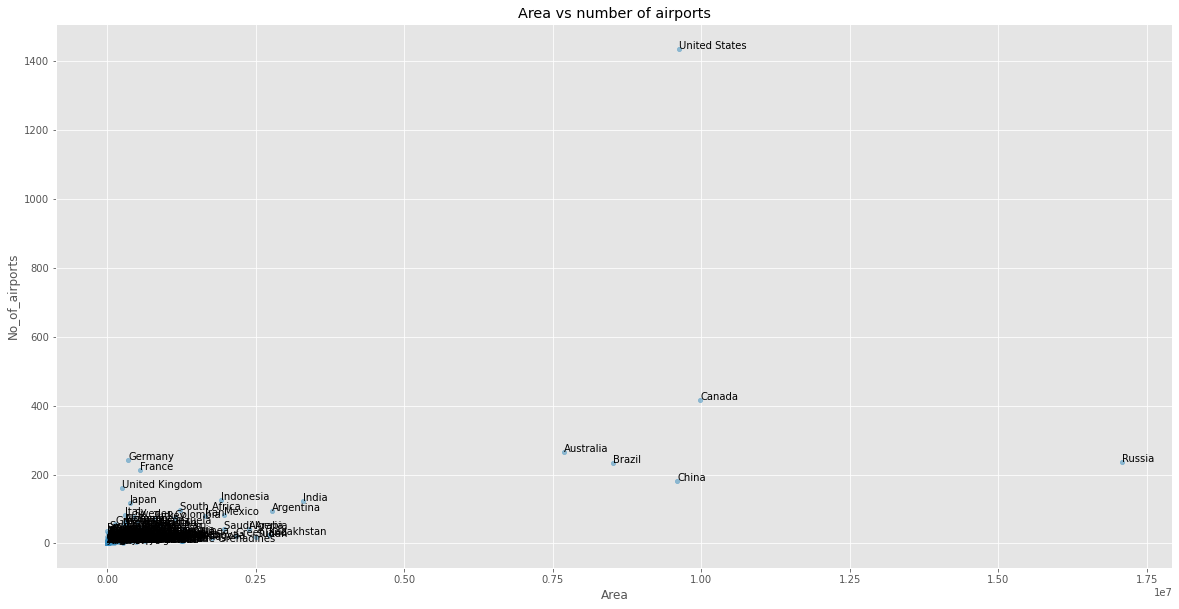

In [194]:
merged_pd = merged.toPandas().set_index('Country')

ax = merged_pd.plot.scatter(x='Area', 
                                y='No_of_airports',
                                title='Area vs number of airports' ,
                                alpha=0.5,figsize=(20, 10))

for i, txt in enumerate(merged_pd.index):
  ax.annotate(txt, (merged_pd['Area'][i], merged_pd['No_of_airports'][i]))

**Zadanie nr 5**

In [201]:
def RegionToContinent(region: str) -> str:

  region = str(region)
  if region.startswith('ASIA'):
    return 'Asia'
  elif region.startswith('EASTERN EUROPE'):
    return 'Europe'
  elif region.startswith('NORTHERN AFRICA'):
    return 'Africa'
  elif region.startswith('WESTERN EUROPE'):
    return 'Europe'
  elif region.startswith('SUB-SAHARAN AFRICA'):
    return 'Africa'
  elif region.startswith('LATIN AMER.'):
    return 'South America'
  elif region.startswith('C.W. OF IND.'):
    return 'Other'
  elif region.startswith('NEAR EAST'):
    return 'Asia'
  elif region.startswith('NORTHERN AMERICA'):
    return 'North America'
  elif region.startswith('BALTICS'):
    return 'Europe'
  elif region.startswith('OCEANIA'):
    return 'Australia'

Reg2Cont_udf = udf(RegionToContinent, StringType())

merged = merged.withColumn('Continent', Reg2Cont_udf('Region'))
merged.show(20)

+----------+-------+--------------------+--------------+-------------+
|   Country|   Area|              Region|No_of_airports|    Continent|
+----------+-------+--------------------+--------------+-------------+
|     Egypt|1001450|NORTHERN AFRICA  ...|            24|       Africa|
|Montserrat|    102|LATIN AMER. & CAR...|             1|South America|
|  Anguilla|    102|LATIN AMER. & CAR...|             1|South America|
|   Iceland| 103000|WESTERN EUROPE   ...|            20|       Europe|
|Mauritania|1030700|SUB-SAHARAN AFRIC...|            11|       Africa|
|   Lebanon|  10400|NEAR EAST        ...|             3|         Asia|
| Guatemala| 108890|LATIN AMER. & CAR...|            10|South America|
| Hong Kong|   1092|ASIA (EX. NEAR EA...|             3|         Asia|
|   Bolivia|1098580|LATIN AMER. & CAR...|            23|South America|
|   Jamaica|  10991|LATIN AMER. & CAR...|             6|South America|
|Martinique|   1100|LATIN AMER. & CAR...|             1|South America|
|     

Grupujemy po kontynencie.

In [204]:
merged_by_continent = merged \
              .groupby('Continent') \
              .sum('No_of_airports')

merged_by_continent = merged_by_continent.toDF(*("Continent",
                       "Sum_of_airports"))
merged_by_continent.show(20)

+-------------+---------------+
|    Continent|Sum_of_airports|
+-------------+---------------+
|       Europe|           1389|
|       Africa|            655|
|        Other|            355|
|North America|           1874|
|South America|            920|
|         Asia|           1264|
|    Australia|            512|
+-------------+---------------+



Rysujemy wykres słupkowy.

<BarContainer object of 7 artists>

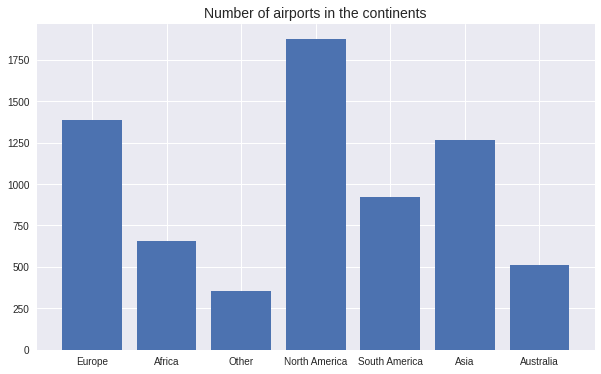

In [205]:
# Barplot
merged_by_continent = merged_by_continent.toPandas()

plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.title("Number of airports in the continents", fontsize = 14)
plt.bar(merged_by_continent['Continent'], merged_by_continent['Sum_of_airports'])